In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [28]:
# Load Dataset
df = pd.read_csv("C:/Users/STUDENT/Downloads/Churn_Modelling.csv")
print("Dataset Head:")
print(df.head())

# Drop Unnecessary Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode Categorical
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])         
df['Geography'] = le.fit_transform(df['Geography']) 

🔹 Dataset Head:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0

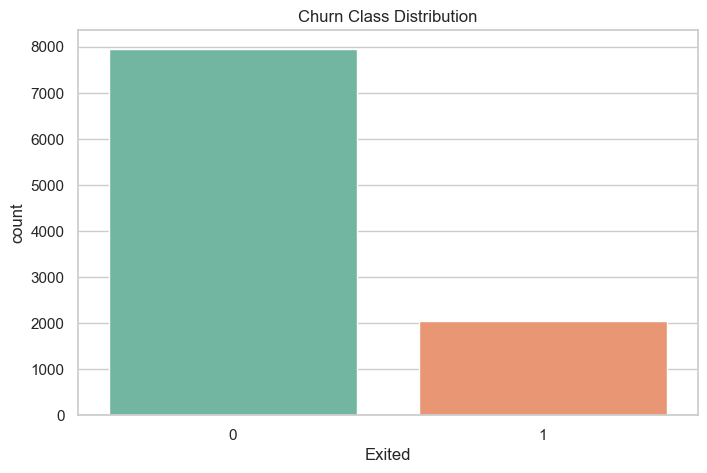

In [30]:
# Class Distribution Count
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Churn Class Distribution")
plt.show()

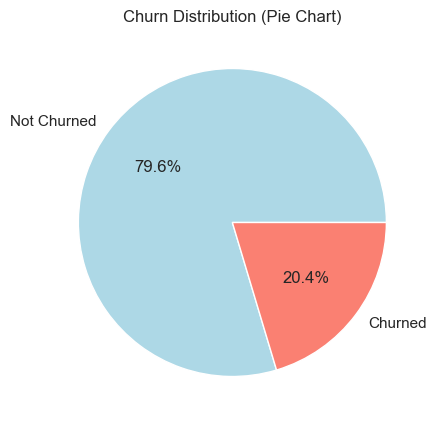

In [31]:
# Pie Chart
plt.figure(figsize=(5, 5))
df['Exited'].value_counts().plot.pie(labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Churn Distribution (Pie Chart)")
plt.ylabel("")
plt.show()

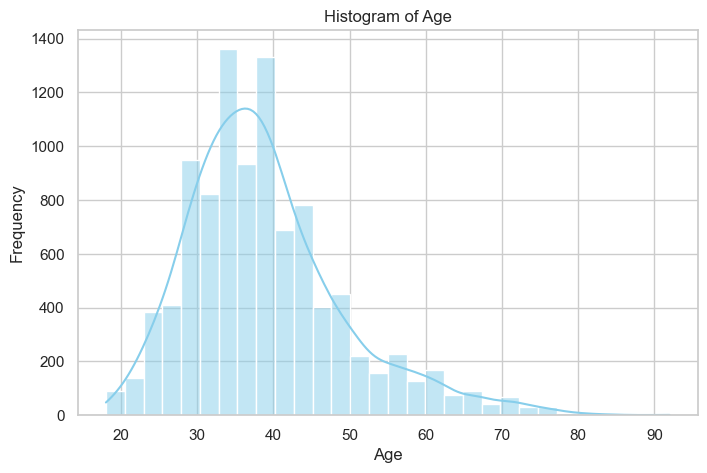

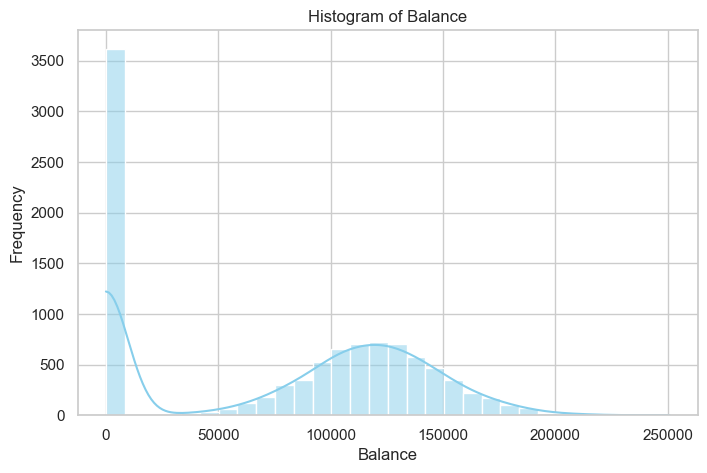

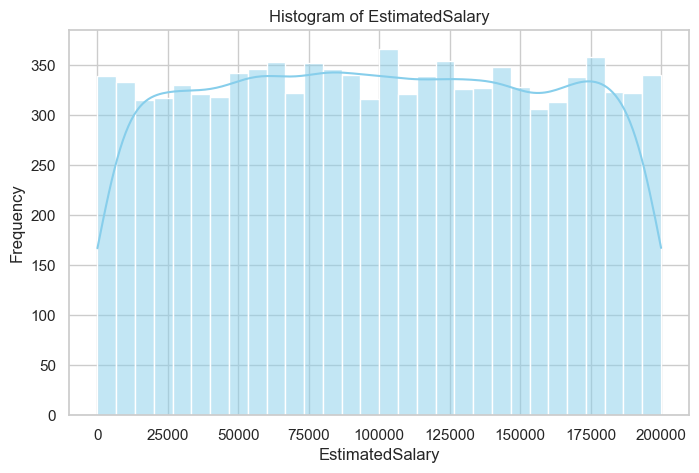

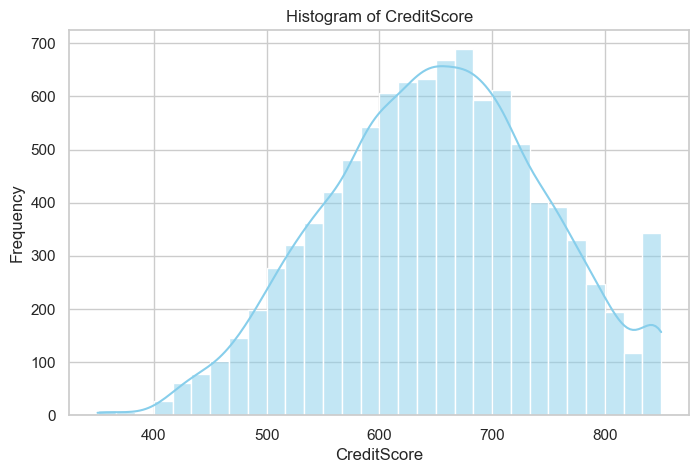

In [32]:
# Histograms
for col in ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']:
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

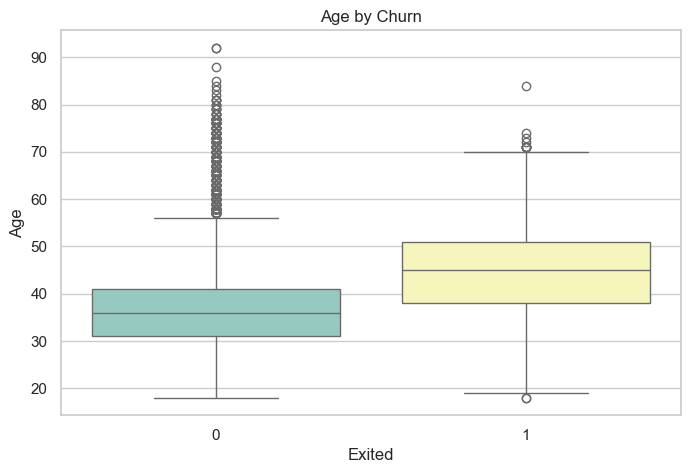

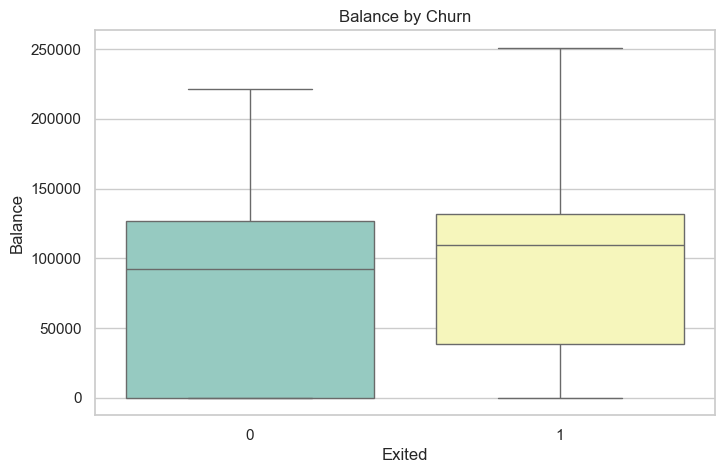

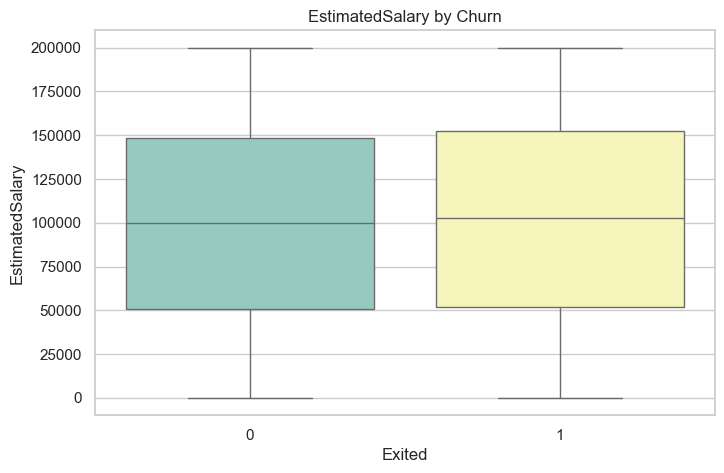

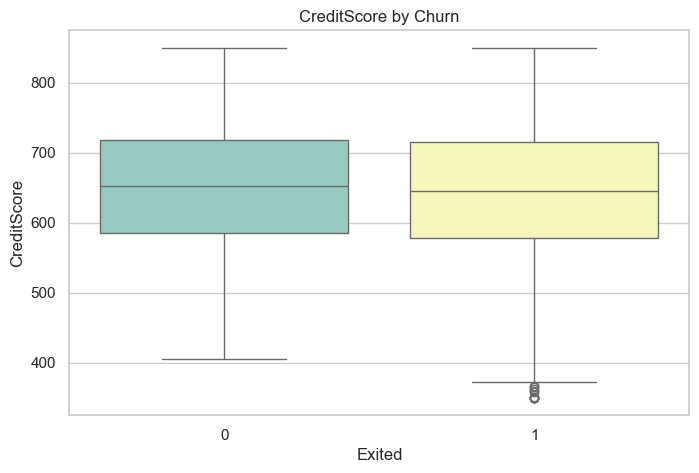

In [33]:
# Boxplots
for col in ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']:
    sns.boxplot(x='Exited', y=col, data=df, palette='Set3')
    plt.title(f"{col} by Churn")
    plt.show()

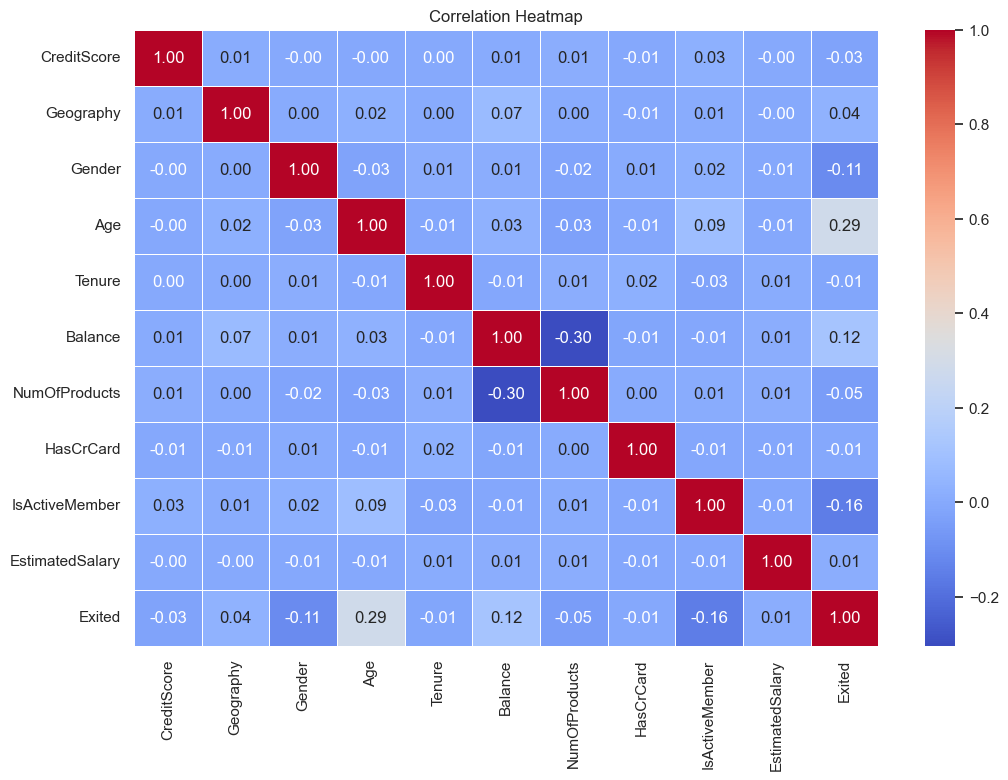

In [34]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [35]:
# Features and Target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Train-Test Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Models
log_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


 Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



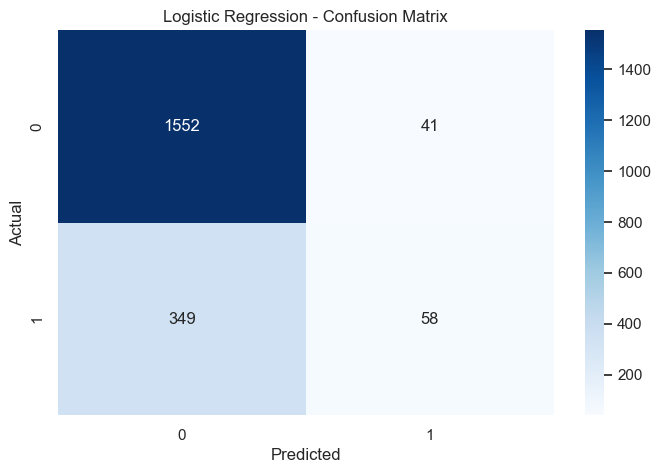

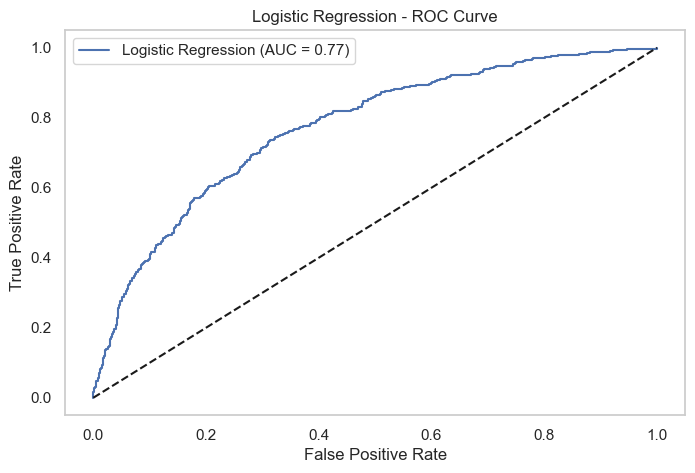


 Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



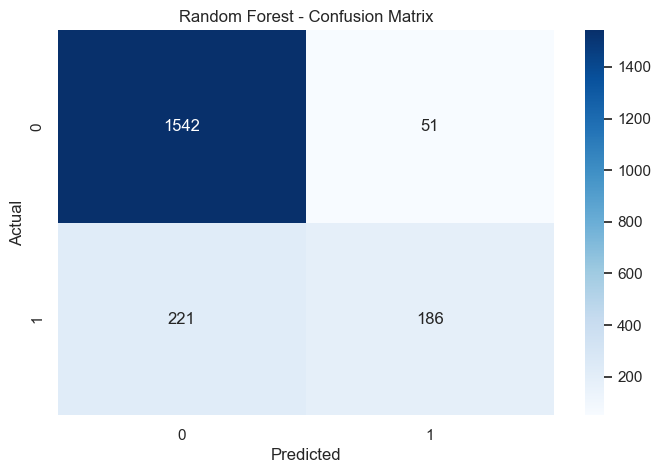

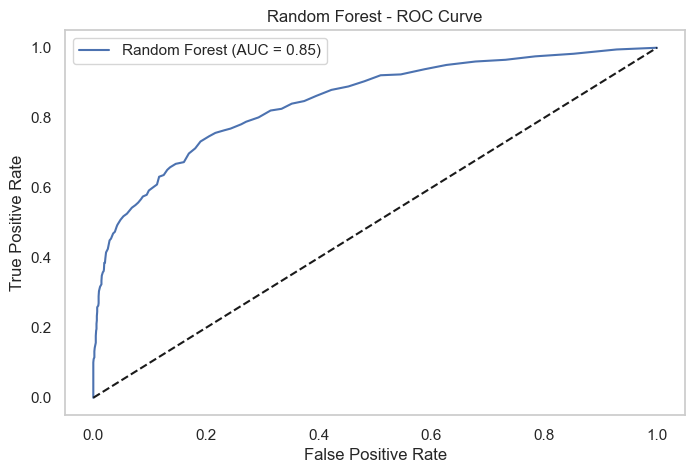

In [36]:
# Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n {name} - Classification Report")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate Both Models
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")

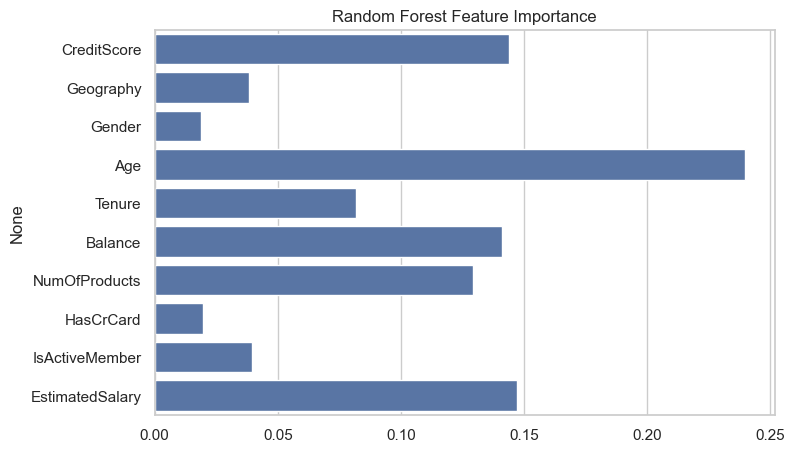

In [37]:
# FEATURE IMPORTANCE
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.show()


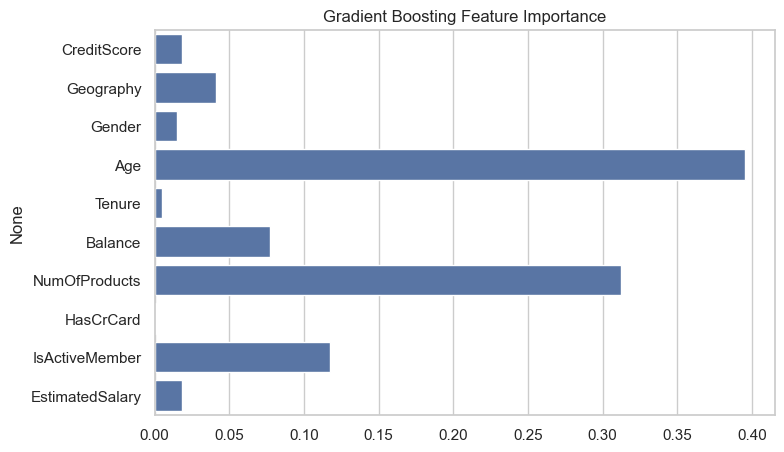

In [38]:
sns.barplot(x=gb_model.feature_importances_, y=X.columns)
plt.title("Gradient Boosting Feature Importance")
plt.show()


In [ ]:
# ROC CURVE + AUC
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()